In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import pylab as pl
from sklearn import preprocessing
%matplotlib inline


In [2]:
df_train = pd.read_csv("train_v9rqX0R.csv")
df_test = pd.read_csv("test_AbJTz2l.csv")

In [3]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


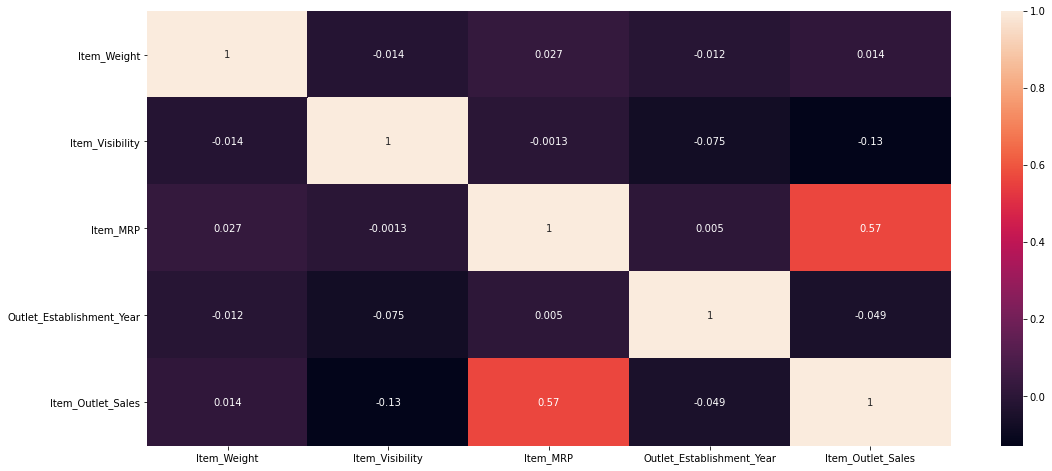

In [5]:
plt.figure(figsize=(18, 8))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [6]:
sample = pd.DataFrame()

In [7]:
#outliers_to_fix = ["Item_Outlet_Sales"]

In [8]:
#df_train[outliers_to_fix] = np.log(df_train[outliers_to_fix] + 1)

In [9]:
sample["Item_Identifier"] = df_test["Item_Identifier"]


In [10]:
sample

,Item_Identifier
0,FDW58
1,FDW14
2,NCN55
3,FDQ58
4,FDY38
...,...
5676,FDB58
5677,FDD47
5678,NCO17
5679,FDJ26


In [11]:
sample["Outlet_Identifier"] = df_test["Outlet_Identifier"]

In [12]:
sample

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95),
                               df[column].median(),
                               df[column])
    return df[column]

df_train['Item_Visibility'] = fix_outlier(df_train, 'Item_Visibility')

In [13]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


drop_col = df_train.drop("Item_Identifier", axis = 1)

drop_col

In [14]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [17]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [19]:
cat_col_tr = []
num_col_tr = []
for i in df_train:
    if df_train[i].dtypes == "object":
        cat_col_tr.append(i)
    else:
        num_col_tr.append(i)
        

In [20]:
cat_col_te = []
num_col_te = []
for i in df_test:
    if df_test[i].dtypes == "object":
        cat_col_te.append(i)
    else:
        num_col_te.append(i)

In [21]:
cat_col_tr

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [22]:
num_col_tr

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [23]:
num_col_tr.remove("Item_Outlet_Sales")

In [24]:
num_col_tr

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [25]:
for i in cat_col_tr:
    print(df_train[i].value_counts())

FDW13    10
FDG33    10
FDU12     9
FDW49     9
FDW26     9
         ..
DRF48     1
FDK57     1
FDO33     1
FDY43     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    279

In [26]:
for i in num_col_tr:
    print(df_train[i].value_counts())

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
6.775      2
9.420      1
6.520      1
5.400      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64
0.000000    526
0.076975      3
0.072238      2
0.080766      2
0.058543      2
           ... 
0.024343      1
0.041823      1
0.023154      1
0.047783      1
0.031007      1
Name: Item_Visibility, Length: 7880, dtype: int64
172.0422    7
109.5228    6
142.0154    6
170.5422    6
196.5084    6
           ..
175.0396    1
188.2872    1
111.6570    1
85.2224     1
58.2562     1
Name: Item_MRP, Length: 5938, dtype: int64
1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


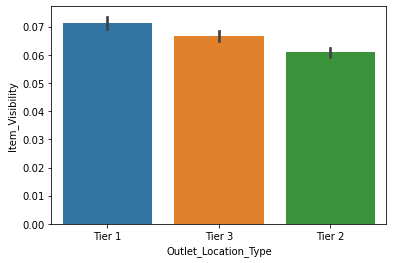

In [27]:
sns.barplot(x = "Outlet_Location_Type", y = "Item_Visibility", data = df_train)
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

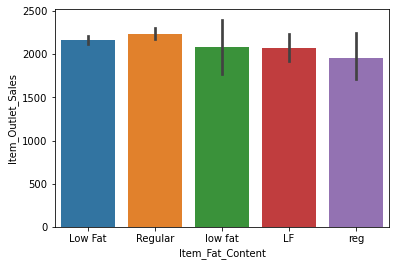

In [28]:
'''
plt.figure(figsize = (18,8))
ax = 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()
'''

sns.barplot(data = df_train, x = "Item_Fat_Content", y= "Item_Outlet_Sales")





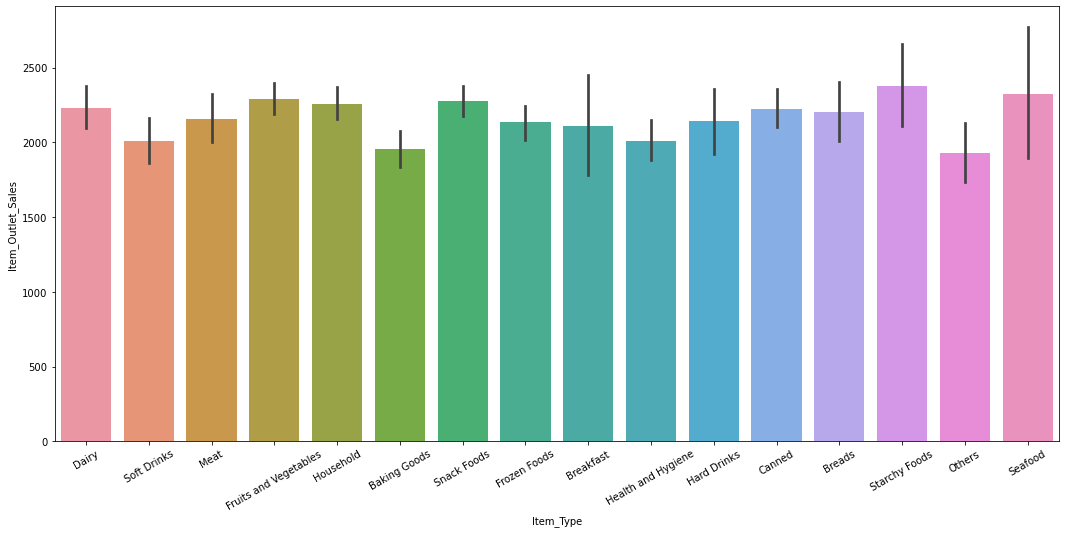

In [29]:
plt.figure(figsize = (18,8))
bx = sns.barplot(data = df_train, x = "Item_Type", y= "Item_Outlet_Sales")
bx.set_xticklabels(bx.get_xticklabels(), rotation = 30)
plt.show()





In [30]:
df_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(), inplace = True)
#df_train.fillna(-999, inplace=True)

    

In [32]:
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(), inplace = True)
#df_test.fillna(-999, inplace=True)   

In [33]:
#df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0], inplace = True)
#df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].mode()[0], inplace = True)

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [35]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [36]:
#profile = ProfileReport(df_train)

In [37]:
#profile


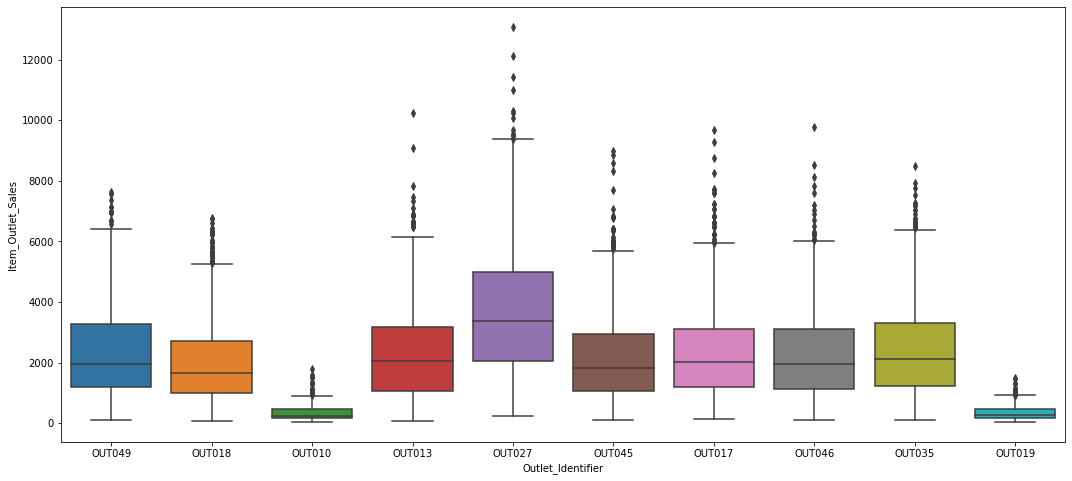

In [38]:
plt.figure(figsize = (18, 8))
sns.boxplot(x = "Outlet_Identifier", y = "Item_Outlet_Sales", data = df_train)
plt.show()

In [39]:
cat_col_tr

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [40]:
num_col_tr

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [41]:
cat_col_onehot = ["Item_Fat_Content", "Item_Type"]
cat_col_label = ["Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "Outlet_Identifier"]

In [42]:

df_train = pd.get_dummies(df_train, columns = cat_col_onehot)
df_test = pd.get_dummies(df_test, columns = cat_col_onehot)


In [43]:
df_train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.380,0.046982,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,...,0,0,0,0,0,0,0,1,0,0


In [44]:
label = preprocessing.LabelEncoder()

In [45]:
#label enconding Item_Type
#df_train["Item_Type"] = label.fit_transform(df_train["Item_Type"])
#df_test["Item_Type"] = label.fit_transform(df_test["Item_Type"])

#label encoding Outlet_Size
df_train["Outlet_Size"] = label.fit_transform(df_train["Outlet_Size"])
df_test["Outlet_Size"] = label.fit_transform(df_test["Outlet_Size"])

#label encoding Outlet_Location_Type
df_train["Outlet_Location_Type"] = label.fit_transform(df_train["Outlet_Location_Type"])
df_test["Outlet_Location_Type"] = label.fit_transform(df_test["Outlet_Location_Type"])

#label encoding Outlet_Location_Type
df_train["Outlet_Type"] = label.fit_transform(df_train["Outlet_Type"])
df_test["Outlet_Type"] = label.fit_transform(df_test["Outlet_Type"])




In [46]:
#label enconding Item_Identifier
df_train["Item_Identifier"] = label.fit_transform(df_train["Item_Identifier"])
df_test["Item_Identifier"] = label.fit_transform(df_test["Item_Identifier"])

In [47]:
#label enconding Item_Identifier
df_train["Outlet_Identifier"] = label.fit_transform(df_train["Outlet_Identifier"])
df_test["Outlet_Identifier"] = label.fit_transform(df_test["Outlet_Identifier"])

In [48]:
df_train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,156,9.300,0.016047,249.8092,9,1999,1,0,1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,8,5.920,0.019278,48.2692,3,2009,1,2,2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,662,17.500,0.016760,141.6180,9,1999,1,0,1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,1121,19.200,0.000000,182.0950,0,1998,3,2,0,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,1297,8.930,0.000000,53.8614,1,1987,0,2,1,994.7052,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0.056783,214.5218,1,1987,0,2,1,2778.3834,...,0,0,0,0,0,0,0,1,0,0
8519,897,8.380,0.046982,108.1570,7,2002,3,1,1,549.2850,...,0,0,0,0,0,0,0,0,0,0
8520,1357,10.600,0.035186,85.1224,6,2004,2,1,1,1193.1136,...,0,0,1,0,0,0,0,0,0,0
8521,681,7.210,0.145221,103.1332,3,2009,1,2,2,1845.5976,...,0,0,0,0,0,0,0,1,0,0


In [49]:
the_drop = df_train["Item_Identifier"]

the_drops = df_test["Item_Identifier"]


dropped_the_drops = df_test.drop(["Item_Identifier"], inplace = True, axis = 1)

In [50]:
y = df_train["Item_Outlet_Sales"]

In [51]:
X = df_train.drop("Item_Outlet_Sales", axis = 1)

In [52]:
X

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_LF,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,156,9.300,0.016047,249.8092,9,1999,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8,5.920,0.019278,48.2692,3,2009,1,2,2,0,...,0,0,0,0,0,0,0,0,1,0
2,662,17.500,0.016760,141.6180,9,1999,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1121,19.200,0.000000,182.0950,0,1998,3,2,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1297,8.930,0.000000,53.8614,1,1987,0,2,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0.056783,214.5218,1,1987,0,2,1,0,...,0,0,0,0,0,0,0,1,0,0
8519,897,8.380,0.046982,108.1570,7,2002,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8520,1357,10.600,0.035186,85.1224,6,2004,2,1,1,0,...,0,0,1,0,0,0,0,0,0,0
8521,681,7.210,0.145221,103.1332,3,2009,1,2,2,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   int32  
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   int32  
 5   Outlet_Establishment_Year        8523 non-null   int64  
 6   Outlet_Size                      8523 non-null   int32  
 7   Outlet_Location_Type             8523 non-null   int32  
 8   Outlet_Type                      8523 non-null   int32  
 9   Item_Fat_Content_LF              8523 non-null   uint8  
 10  Item_Fat_Content_Low Fat         8523 non-null   uint8  
 11  Item_Fat_Content_Regular         8523 non-null   uint8  
 12  Item_Fat_Content_low

In [1]:
#Import from sklearn
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer, accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import RobustScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Import from catboost
from catboost import CatBoostClassifier, CatBoostRegressor

#Import from xgboost
import xgboost as xgb

#Import from scipy
from scipy.stats import uniform, truncnorm, randint

#Import from skopt
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize

In [56]:
scaler = StandardScaler()


In [57]:
X[num_col_tr] = scaler.fit_transform(X[num_col_tr])



In [58]:
df_test[num_col_te] = scaler.fit_transform(df_test[num_col_te])

In [59]:
df_test

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_LF,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,1103,1.897460e+00,-1.134077,-0.536555,9,0.139891,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1067,-1.035530e+00,-0.531850,-0.868937,2,1.095512,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1406,4.486336e-01,0.661316,1.629848,0,0.020438,3,2,0,0,...,0,0,0,0,0,1,0,0,0,0
3,809,-1.267578e+00,-0.981416,0.226697,2,1.095512,3,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1184,-5.230960e-14,1.032540,1.508110,5,-1.532446,1,2,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,-5.172506e-01,-1.018333,0.004727,8,-0.099015,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5677,306,-1.200437e+00,1.508493,0.455014,3,1.334417,1,2,2,0,...,0,0,0,0,0,0,0,0,0,1
5678,1412,-6.350414e-01,0.153074,-0.360485,7,0.498248,3,1,1,0,...,0,0,1,0,0,0,0,0,0,0
5679,517,6.135406e-01,-1.281690,1.190844,2,1.095512,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_LF,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,156,-0.841872,-0.970732,1.747454,9,0.139541,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8,-1.641706,-0.908111,-1.489023,3,1.334103,1,2,2,0,...,0,0,0,0,0,0,0,0,1,0
2,662,1.098554,-0.956917,0.010040,9,0.139541,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1121,1.500838,-1.281758,0.660050,0,0.020085,3,2,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1297,-0.929428,-1.281758,-1.399220,1,-1.293934,0,2,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,-1.418084,-0.181193,1.180783,1,-1.293934,0,2,1,0,...,0,0,0,0,0,0,0,1,0,0
8519,897,-1.059578,-0.371154,-0.527301,7,0.497909,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8520,1357,-0.534243,-0.599784,-0.897208,6,0.736822,2,1,1,0,...,0,0,1,0,0,0,0,0,0,0
8521,681,-1.336444,1.532880,-0.607977,3,1.334103,1,2,2,0,...,0,0,0,0,0,0,0,1,0,0


In [1]:
X.shape

NameError: name 'X' is not defined

In [61]:
categorical_var = np.where(X.dtypes != float)[0]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 200)


In [1]:
LR = CatBoostRegressor()


NameError: name 'CatBoostRegressor' is not defined

In [64]:
'''parameters = {'learning_rate': [0.009,0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
               

}

'''

parameters = {'learning_rate':[0.03],
              'max_depth': [3],
              'n_estimators': [900]
}



LR = BayesSearchCV(estimator = LR, search_spaces=parameters, n_jobs= -1, cv=5, n_iter=5, verbose=4)

In [65]:
LR.fit(X_train, y_train, cat_features = categorical_var, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1685.1036765	test: 1670.0953013	best: 1670.0953013 (0)	total: 177ms	remaining: 2m 39s
1:	learn: 1659.1909947	test: 1644.1215970	best: 1644.1215970 (1)	total: 214ms	remaining: 1m 36s
2:	learn: 1634.2003503	test: 1618.8242195	best: 1618.8242195 (2)	total: 263ms	remaining: 1m 18s
3:	learn: 1610.0456668	test: 1594.2780879	best: 1594.2780879 (3)	total: 304ms	remaining: 1m 8s
4:	learn: 1586.6914279	test: 1570.7616641	best: 1570.7616641 (4)	total: 335ms	remaining: 1m
5:	learn: 1566.3490383	test: 1550.1538280	best: 1550.1538280 (5)	total: 357ms	remaining: 53.2s
6:	learn: 1544.9236459	test: 1528.0963657	best: 1528.0963657 (6)	total: 395ms	remaining: 50.4s
7:	learn: 1524.6754462	test: 1507.4960694	best: 1507.4960694 (7)	total: 437ms	remaining: 48.8s
8:	learn: 1504.9045318	test: 1487.7733003	best: 1487.7733003 (8)	total: 481ms	remaining: 47.6s
9:	learn: 1485.6385816	test: 1468.3766938	best: 1468.3766938 (9)	total: 553ms	remaining: 49.3s
10:	learn: 1467.3266405	test: 1449.8906130	best: 1

90:	learn: 1082.1557119	test: 1062.0248737	best: 1062.0248737 (90)	total: 3.75s	remaining: 33.4s
91:	learn: 1081.8888346	test: 1061.8258474	best: 1061.8258474 (91)	total: 3.77s	remaining: 33.2s
92:	learn: 1081.4074987	test: 1061.3627975	best: 1061.3627975 (92)	total: 3.81s	remaining: 33.1s
93:	learn: 1080.9617834	test: 1060.8470019	best: 1060.8470019 (93)	total: 3.85s	remaining: 33s
94:	learn: 1080.6567867	test: 1060.5370375	best: 1060.5370375 (94)	total: 3.89s	remaining: 33s
95:	learn: 1080.2526395	test: 1060.4060893	best: 1060.4060893 (95)	total: 3.96s	remaining: 33.1s
96:	learn: 1079.8471925	test: 1060.0592128	best: 1060.0592128 (96)	total: 4.01s	remaining: 33.2s
97:	learn: 1079.5240266	test: 1059.7345796	best: 1059.7345796 (97)	total: 4.07s	remaining: 33.3s
98:	learn: 1079.1367532	test: 1059.4141190	best: 1059.4141190 (98)	total: 4.11s	remaining: 33.2s
99:	learn: 1078.7539985	test: 1059.1044932	best: 1059.1044932 (99)	total: 4.16s	remaining: 33.2s
100:	learn: 1078.4304235	test: 105

174:	learn: 1065.1454121	test: 1052.3484102	best: 1052.3355811 (173)	total: 7.4s	remaining: 30.7s
175:	learn: 1065.0884045	test: 1052.3336652	best: 1052.3336652 (175)	total: 7.43s	remaining: 30.6s
176:	learn: 1064.9302018	test: 1052.3140608	best: 1052.3140608 (176)	total: 7.47s	remaining: 30.5s
177:	learn: 1064.8064849	test: 1052.2536452	best: 1052.2536452 (177)	total: 7.52s	remaining: 30.5s
178:	learn: 1064.7180516	test: 1052.2563160	best: 1052.2536452 (177)	total: 7.57s	remaining: 30.5s
179:	learn: 1064.3450494	test: 1052.3969308	best: 1052.2536452 (177)	total: 7.62s	remaining: 30.5s
180:	learn: 1064.1968450	test: 1052.4233165	best: 1052.2536452 (177)	total: 7.66s	remaining: 30.4s
181:	learn: 1064.0614456	test: 1052.3700518	best: 1052.2536452 (177)	total: 7.71s	remaining: 30.4s
182:	learn: 1063.9795688	test: 1052.3840356	best: 1052.2536452 (177)	total: 7.75s	remaining: 30.4s
183:	learn: 1063.9091161	test: 1052.3683152	best: 1052.2536452 (177)	total: 7.79s	remaining: 30.3s
184:	learn:

261:	learn: 1055.7898723	test: 1051.9913210	best: 1051.4646503 (222)	total: 10.9s	remaining: 26.5s
262:	learn: 1055.7376425	test: 1051.9831130	best: 1051.4646503 (222)	total: 10.9s	remaining: 26.5s
263:	learn: 1055.7142973	test: 1052.0082579	best: 1051.4646503 (222)	total: 11s	remaining: 26.4s
264:	learn: 1055.6289858	test: 1052.0162339	best: 1051.4646503 (222)	total: 11s	remaining: 26.4s
265:	learn: 1055.6286580	test: 1052.0166500	best: 1051.4646503 (222)	total: 11s	remaining: 26.3s
266:	learn: 1055.6019322	test: 1052.0437085	best: 1051.4646503 (222)	total: 11.1s	remaining: 26.3s
267:	learn: 1055.4071604	test: 1052.1295226	best: 1051.4646503 (222)	total: 11.1s	remaining: 26.2s
268:	learn: 1055.1030284	test: 1052.1668652	best: 1051.4646503 (222)	total: 11.2s	remaining: 26.2s
269:	learn: 1054.9605475	test: 1052.1807576	best: 1051.4646503 (222)	total: 11.2s	remaining: 26.2s
270:	learn: 1054.6989666	test: 1052.2546449	best: 1051.4646503 (222)	total: 11.3s	remaining: 26.2s
271:	learn: 1054

350:	learn: 1044.8736851	test: 1052.9683225	best: 1051.4646503 (222)	total: 14.5s	remaining: 22.7s
351:	learn: 1044.7402899	test: 1052.9103493	best: 1051.4646503 (222)	total: 14.6s	remaining: 22.7s
352:	learn: 1044.6758441	test: 1052.8721075	best: 1051.4646503 (222)	total: 14.6s	remaining: 22.6s
353:	learn: 1044.5184101	test: 1052.8508683	best: 1051.4646503 (222)	total: 14.6s	remaining: 22.6s
354:	learn: 1044.4874769	test: 1052.8715428	best: 1051.4646503 (222)	total: 14.7s	remaining: 22.5s
355:	learn: 1044.0541232	test: 1052.9601665	best: 1051.4646503 (222)	total: 14.7s	remaining: 22.5s
356:	learn: 1043.9412490	test: 1052.9311685	best: 1051.4646503 (222)	total: 14.8s	remaining: 22.5s
357:	learn: 1043.9008996	test: 1052.9114504	best: 1051.4646503 (222)	total: 14.8s	remaining: 22.4s
358:	learn: 1043.5014321	test: 1052.8811950	best: 1051.4646503 (222)	total: 14.9s	remaining: 22.4s
359:	learn: 1043.2733019	test: 1052.8963002	best: 1051.4646503 (222)	total: 14.9s	remaining: 22.3s
360:	learn

434:	learn: 1034.9298907	test: 1052.8344489	best: 1051.4646503 (222)	total: 17.7s	remaining: 18.9s
435:	learn: 1034.7106516	test: 1052.8225597	best: 1051.4646503 (222)	total: 17.8s	remaining: 18.9s
436:	learn: 1034.7023873	test: 1052.8187866	best: 1051.4646503 (222)	total: 17.8s	remaining: 18.9s
437:	learn: 1034.6261892	test: 1052.8232314	best: 1051.4646503 (222)	total: 17.8s	remaining: 18.8s
438:	learn: 1034.5889728	test: 1052.8487993	best: 1051.4646503 (222)	total: 17.9s	remaining: 18.8s
439:	learn: 1034.4361929	test: 1052.8946477	best: 1051.4646503 (222)	total: 17.9s	remaining: 18.7s
440:	learn: 1034.3290858	test: 1052.9071139	best: 1051.4646503 (222)	total: 17.9s	remaining: 18.7s
441:	learn: 1034.1985330	test: 1052.9369862	best: 1051.4646503 (222)	total: 18s	remaining: 18.6s
442:	learn: 1033.5966764	test: 1052.9642414	best: 1051.4646503 (222)	total: 18s	remaining: 18.6s
443:	learn: 1033.5489973	test: 1052.9910531	best: 1051.4646503 (222)	total: 18s	remaining: 18.5s
444:	learn: 1033

518:	learn: 1024.7986464	test: 1053.9722150	best: 1051.4646503 (222)	total: 21.1s	remaining: 15.5s
519:	learn: 1024.4924115	test: 1053.9994884	best: 1051.4646503 (222)	total: 21.1s	remaining: 15.5s
520:	learn: 1024.4761034	test: 1053.9969141	best: 1051.4646503 (222)	total: 21.2s	remaining: 15.4s
521:	learn: 1024.4307835	test: 1054.0259664	best: 1051.4646503 (222)	total: 21.2s	remaining: 15.4s
522:	learn: 1024.2518659	test: 1054.1157762	best: 1051.4646503 (222)	total: 21.2s	remaining: 15.3s
523:	learn: 1024.2398651	test: 1054.1158459	best: 1051.4646503 (222)	total: 21.3s	remaining: 15.3s
524:	learn: 1024.1123989	test: 1054.0682172	best: 1051.4646503 (222)	total: 21.3s	remaining: 15.2s
525:	learn: 1024.0011620	test: 1054.1416959	best: 1051.4646503 (222)	total: 21.4s	remaining: 15.2s
526:	learn: 1023.8080211	test: 1054.1077038	best: 1051.4646503 (222)	total: 21.4s	remaining: 15.2s
527:	learn: 1023.7118024	test: 1054.1389755	best: 1051.4646503 (222)	total: 21.5s	remaining: 15.1s
528:	learn

605:	learn: 1014.2479242	test: 1055.0570486	best: 1051.4646503 (222)	total: 24.4s	remaining: 11.9s
606:	learn: 1014.1063135	test: 1055.1005711	best: 1051.4646503 (222)	total: 24.5s	remaining: 11.8s
607:	learn: 1013.9436505	test: 1055.1994927	best: 1051.4646503 (222)	total: 24.5s	remaining: 11.8s
608:	learn: 1013.9306844	test: 1055.1993533	best: 1051.4646503 (222)	total: 24.5s	remaining: 11.7s
609:	learn: 1013.8327074	test: 1055.2148052	best: 1051.4646503 (222)	total: 24.6s	remaining: 11.7s
610:	learn: 1013.6984571	test: 1055.2473797	best: 1051.4646503 (222)	total: 24.6s	remaining: 11.6s
611:	learn: 1013.5534413	test: 1055.2504029	best: 1051.4646503 (222)	total: 24.6s	remaining: 11.6s
612:	learn: 1013.5355694	test: 1055.2511213	best: 1051.4646503 (222)	total: 24.7s	remaining: 11.6s
613:	learn: 1013.5273802	test: 1055.2525229	best: 1051.4646503 (222)	total: 24.7s	remaining: 11.5s
614:	learn: 1013.4652622	test: 1055.2353095	best: 1051.4646503 (222)	total: 24.8s	remaining: 11.5s
615:	learn

693:	learn: 1004.4639758	test: 1056.9284872	best: 1051.4646503 (222)	total: 28.2s	remaining: 8.37s
694:	learn: 1004.3138862	test: 1056.9596009	best: 1051.4646503 (222)	total: 28.2s	remaining: 8.33s
695:	learn: 1004.1662877	test: 1056.9605213	best: 1051.4646503 (222)	total: 28.3s	remaining: 8.29s
696:	learn: 1003.9525495	test: 1057.1048326	best: 1051.4646503 (222)	total: 28.3s	remaining: 8.25s
697:	learn: 1003.8679812	test: 1057.1378540	best: 1051.4646503 (222)	total: 28.4s	remaining: 8.22s
698:	learn: 1003.7753288	test: 1057.1733940	best: 1051.4646503 (222)	total: 28.4s	remaining: 8.18s
699:	learn: 1003.7200265	test: 1057.2079232	best: 1051.4646503 (222)	total: 28.5s	remaining: 8.14s
700:	learn: 1003.6103454	test: 1057.2002643	best: 1051.4646503 (222)	total: 28.5s	remaining: 8.1s
701:	learn: 1003.5172982	test: 1057.1941628	best: 1051.4646503 (222)	total: 28.6s	remaining: 8.06s
702:	learn: 1003.3634314	test: 1057.3007035	best: 1051.4646503 (222)	total: 28.6s	remaining: 8.02s
703:	learn:

780:	learn: 995.2273865	test: 1058.5589720	best: 1051.4646503 (222)	total: 32.2s	remaining: 4.91s
781:	learn: 995.1743818	test: 1058.5638221	best: 1051.4646503 (222)	total: 32.3s	remaining: 4.87s
782:	learn: 995.1515594	test: 1058.5686475	best: 1051.4646503 (222)	total: 32.3s	remaining: 4.83s
783:	learn: 995.0871913	test: 1058.5851551	best: 1051.4646503 (222)	total: 32.4s	remaining: 4.79s
784:	learn: 994.9389730	test: 1058.4635357	best: 1051.4646503 (222)	total: 32.4s	remaining: 4.75s
785:	learn: 994.8117279	test: 1058.4787819	best: 1051.4646503 (222)	total: 32.5s	remaining: 4.71s
786:	learn: 994.7044887	test: 1058.4902379	best: 1051.4646503 (222)	total: 32.5s	remaining: 4.67s
787:	learn: 994.5547362	test: 1058.4937925	best: 1051.4646503 (222)	total: 32.6s	remaining: 4.63s
788:	learn: 994.4763030	test: 1058.5175910	best: 1051.4646503 (222)	total: 32.6s	remaining: 4.59s
789:	learn: 994.3547179	test: 1058.4999415	best: 1051.4646503 (222)	total: 32.7s	remaining: 4.55s
790:	learn: 994.2666

865:	learn: 985.8686717	test: 1059.3890747	best: 1051.4646503 (222)	total: 36.3s	remaining: 1.42s
866:	learn: 985.7961413	test: 1059.4180314	best: 1051.4646503 (222)	total: 36.3s	remaining: 1.38s
867:	learn: 985.7467718	test: 1059.4289944	best: 1051.4646503 (222)	total: 36.4s	remaining: 1.34s
868:	learn: 985.5981589	test: 1059.3706794	best: 1051.4646503 (222)	total: 36.4s	remaining: 1.3s
869:	learn: 985.3951345	test: 1059.4148831	best: 1051.4646503 (222)	total: 36.4s	remaining: 1.26s
870:	learn: 985.2584842	test: 1059.4397067	best: 1051.4646503 (222)	total: 36.5s	remaining: 1.22s
871:	learn: 985.1585720	test: 1059.4656086	best: 1051.4646503 (222)	total: 36.5s	remaining: 1.17s
872:	learn: 985.1509101	test: 1059.4600689	best: 1051.4646503 (222)	total: 36.6s	remaining: 1.13s
873:	learn: 985.1252762	test: 1059.4586052	best: 1051.4646503 (222)	total: 36.7s	remaining: 1.09s
874:	learn: 984.9643072	test: 1059.4827810	best: 1051.4646503 (222)	total: 36.8s	remaining: 1.05s
875:	learn: 984.73729

In [66]:
LR_model = LR.predict(X_test)

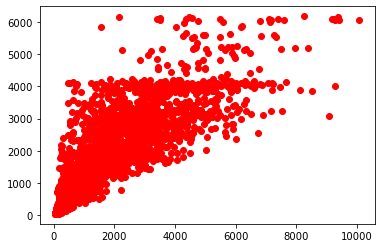

In [67]:
plt.scatter(y_test, LR_model, color = 'red')


print("\n The CV results across all searched params:\n",Bayes_LR.cv_results_)

print("\n The best estimator across ALL searched params:\n",Bayes_LR.best_estimator_)
print("\n The best score across ALL searched params:\n",Bayes_LR.best_score_)
print("\n The best parameters across ALL searched params:\n",Bayes_LR.best_params_)


In [86]:
LR_test = pd.DataFrame([LR_model, y])
LR_test

,0,1,2,3,4,5,6,7,8,9,...,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522
0,3341.930153,1172.32389,2810.248393,2540.061942,1229.046434,894.819919,1939.029126,2090.952426,487.303198,3053.249072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3735.138000,443.42280,2097.270000,732.380000,994.705200,556.608800,343.552800,4022.763600,1076.598600,4710.535000,...,595.2252,468.7232,1571.288,858.882,3608.636,2778.3834,549.285,1193.1136,1845.5976,765.67


In [68]:
mt.mean_absolute_error(y_test, LR_model)

744.120477672205

In [69]:
mt.mean_squared_error(y_test, LR_model)

1105577.9108338766

In [70]:
np.sqrt(mt.mean_squared_error(y_test, LR_model))

1051.464650301605

In [71]:
testing = LR.predict(df_test)

In [72]:
sub = pd.read_csv("sample_submission_8RXa3c6.csv")

In [73]:
sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [74]:
sample["Item_Outlet_Sales"] = testing

In [75]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1786.463273
1,FDW14,OUT017,1474.543771
2,NCN55,OUT010,605.069441
3,FDQ58,OUT017,2453.521346
4,FDY38,OUT027,6097.237422
...,...,...,...
5676,FDB58,OUT046,2291.980859
5677,FDD47,OUT018,2458.844756
5678,NCO17,OUT045,1884.387680
5679,FDJ26,OUT017,3736.781913


In [76]:
sample.describe()

,Item_Outlet_Sales
count,5681.000000
mean,2187.460583
std,1311.736231
min,49.632812
25%,1163.591851
50%,2062.666113
75%,3088.797900
max,6234.089575


In [77]:
sample.to_csv("temm.csv", index = False)

In [78]:
'''zero_append = []
for i in testing:
  if i < 0:
    zero_append.append(0)
  else:
    zero_append.append(i)
'''

'zero_append = []\nfor i in testing:\n  if i < 0:\n    zero_append.append(0)\n  else:\n    zero_append.append(i)\n'

In [79]:
ln = LinearRegression()

parameters = {'learning_rate':[0.9],
              'max_depth': [3],
              'n_estimators': [900]
}



ln_ln = GridSearchCV(ln, parameters, n_jobs= -1, cv=5, verbose=4)

In [80]:
ln.fit(X_train, y_train)

LinearRegression()

In [81]:
Ln_model = ln.predict(X_test)

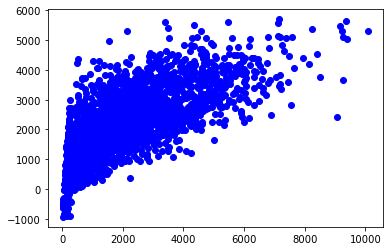

In [82]:
plt.scatter(y_test, Ln_model, color = 'blue')

In [83]:
mt.mean_absolute_error(y_test, Ln_model)

894.2976490514235

In [84]:
mt.mean_squared_error(y_test, Ln_model)

1414002.976864762

In [85]:
np.sqrt(mt.mean_squared_error(y_test, Ln_model))

1189.1185714068895